<a href="https://colab.research.google.com/github/khirodsahoo93/Whatsapp-analyser/blob/master/WhatsApp_analyser_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import re

def startsWithDate(s):
    pattern = '^([0-2][0-9]|(3)[0-1])(\/)(((0)[0-9])|((1)[0-2]))(\/)(\d{2}|\d{4}), ([0-9][0-9]|[0-9]):([0-9][0-9])'
    result = re.match(pattern, s)
    if result:
        return True
    return False


def startsWithAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '([+]\d{2} \d{5} \d{5}):',         # Mobile Number (India)
        '([+]\d{2} \d{3} \d{3} \d{4}):',   # Mobile Number (US)
        '([+]\d{2} \d{4} \d{7})'           # Mobile Number (Europe)
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False


def getDataPoint(line):
    # line = 18/06/17, 22:47 - Loki: Why do you have 2 numbers, Banner?

    splitLine = line.split(' - ')  # splitLine = ['18/06/17, 22:47', 'Loki: Why do you have 2 numbers, Banner?']

    dateTime = splitLine[0]  # dateTime = '18/06/17, 22:47'

    date, time = dateTime.split(', ')  # date = '18/06/17'; time = '22:47'

    message = ' '.join(splitLine[1:])  # message = 'Loki: Why do you have 2 numbers, Banner?'

    if startsWithAuthor(message):  # True
        splitMessage = message.split(': ')  # splitMessage = ['Loki', 'Why do you have 2 numbers, Banner?']
        author = splitMessage[0]  # author = 'Loki'
        message = ' '.join(splitMessage[1:])  # message = 'Why do you have 2 numbers, Banner?'
    else:
        author = None
    return date, time, author, message


parsedData = []  # List to keep track of data so it can be used by a Pandas dataframe
conversationPath = '/content/whatsapp.txt'
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline()  # Skipping first line of the file (usually contains information about end-to-end encryption)

    messageBuffer = []  # Buffer to capture intermediate output for multi-line messages
    date, time, author = None, None, None  # Intermediate variables to keep track of the current message being processed

    while True:
        line = fp.readline()
        #print(line)# can read lines
        if not line:  # Stop reading further if end of file has been reached
            break
        line = line.strip()  # Guarding against erroneous leading and trailing whitespaces
        #print(line)#print lines properly
        if startsWithDate(line):  # If a line starts with a Date Time pattern, then this indicates the beginning of a new message

            if len(messageBuffer) > 0:  # Check if the message buffer contains characters from previous iterations
                #print(messageBuffer)
                parsedData.append([date, time, author,' '.join(messageBuffer)])
                #print(parsedData)# Save the tokens from the previous message in parsedData
            messageBuffer.clear()  # Clear the message buffer so that it can be used for the next message
            date, time, author, message = getDataPoint(line)  # Identify and extract tokens from the line
            messageBuffer.append(message)  # Append message to buffer

        else:
            #print('Entered else loop')#entering here
            messageBuffer.append(line)  # If a line doesn't start with a Date Time pattern, then it is part of a multi-line message. So, just append to buffer


df=pd.DataFrame(parsedData,columns=['Date','Time','Author','Message'])
#df.to_csv(r'/Users/khirod/PycharmProjects/new/whatsapp.csv', index = False, header=True)
Female_names=['Shree Parida','Subhasmita Swain','Saismita Mohapatra','Pupul','Samiksha Pradhan Burla','Manisha','Aanchal']
iter=df.shape[0]
df['Gender']=''
def assign_gender(df):
    for i in range(df.shape[0]):
        if (df['Author'][i] in Female_names) :
            df['Gender'].iloc[i]='female'

        elif (df['Author'][i]== None):
            df['Gender'].iloc[i]='None'
        else:
            df['Gender'].iloc[i] = 'male'


assign_gender(df)
print(df[['Author','Gender']].drop_duplicates(subset='Author'))#print unique rows
print(df.describe())
print(df[df['Author'].isnull()]['Message'])
media_messages_df = df[df['Message'] == '<Media omitted>']
print(media_messages_df.head())



                     Author  Gender
0                      None    None
1              Khirod Sahoo    male
3            Biswajit Panda    male
11         Ashirbad Pradhan    male
12                   Sanket    male
15           Dibyanshu Bhoi    male
56        Rasesh Penn State    male
58                Mihir Das    male
133                   Pupul  female
364  Samiksha Pradhan Burla  female
435             Junaid Khan    male
452            Shree Parida  female
457                  adarsh    male
545      Saismita Mohapatra  female
550        Subhasmita Swain  female
642                 Aanchal  female
            Date     Time          Author          Message Gender
count       1384     1384            1363             1384   1384
unique         4      262              15             1125      3
top     29/03/20  1:32 am  Biswajit Panda  <Media omitted>   male
freq         657       27             352               41   1100
0            You created group "ଆସ ମିଶିକି ଏଠି ହଗିବା💩💩💩🤢"
2

Index(['Subhasmita Swain', 'Aanchal', 'Saismita Mohapatra', 'Sanket', 'adarsh',
       'Samiksha Pradhan Burla', 'Dibyanshu Bhoi', 'Junaid Khan',
       'Shree Parida', 'Rasesh Penn State', 'Mihir Das', 'Pupul',
       'Ashirbad Pradhan', 'Khirod Sahoo', 'Biswajit Panda'],
      dtype='object')
0 1
1 1
2 4
3 8
4 12
5 17
6 31
7 47
8 63
9 67
10 120
11 177
12 195
13 268
14 352


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


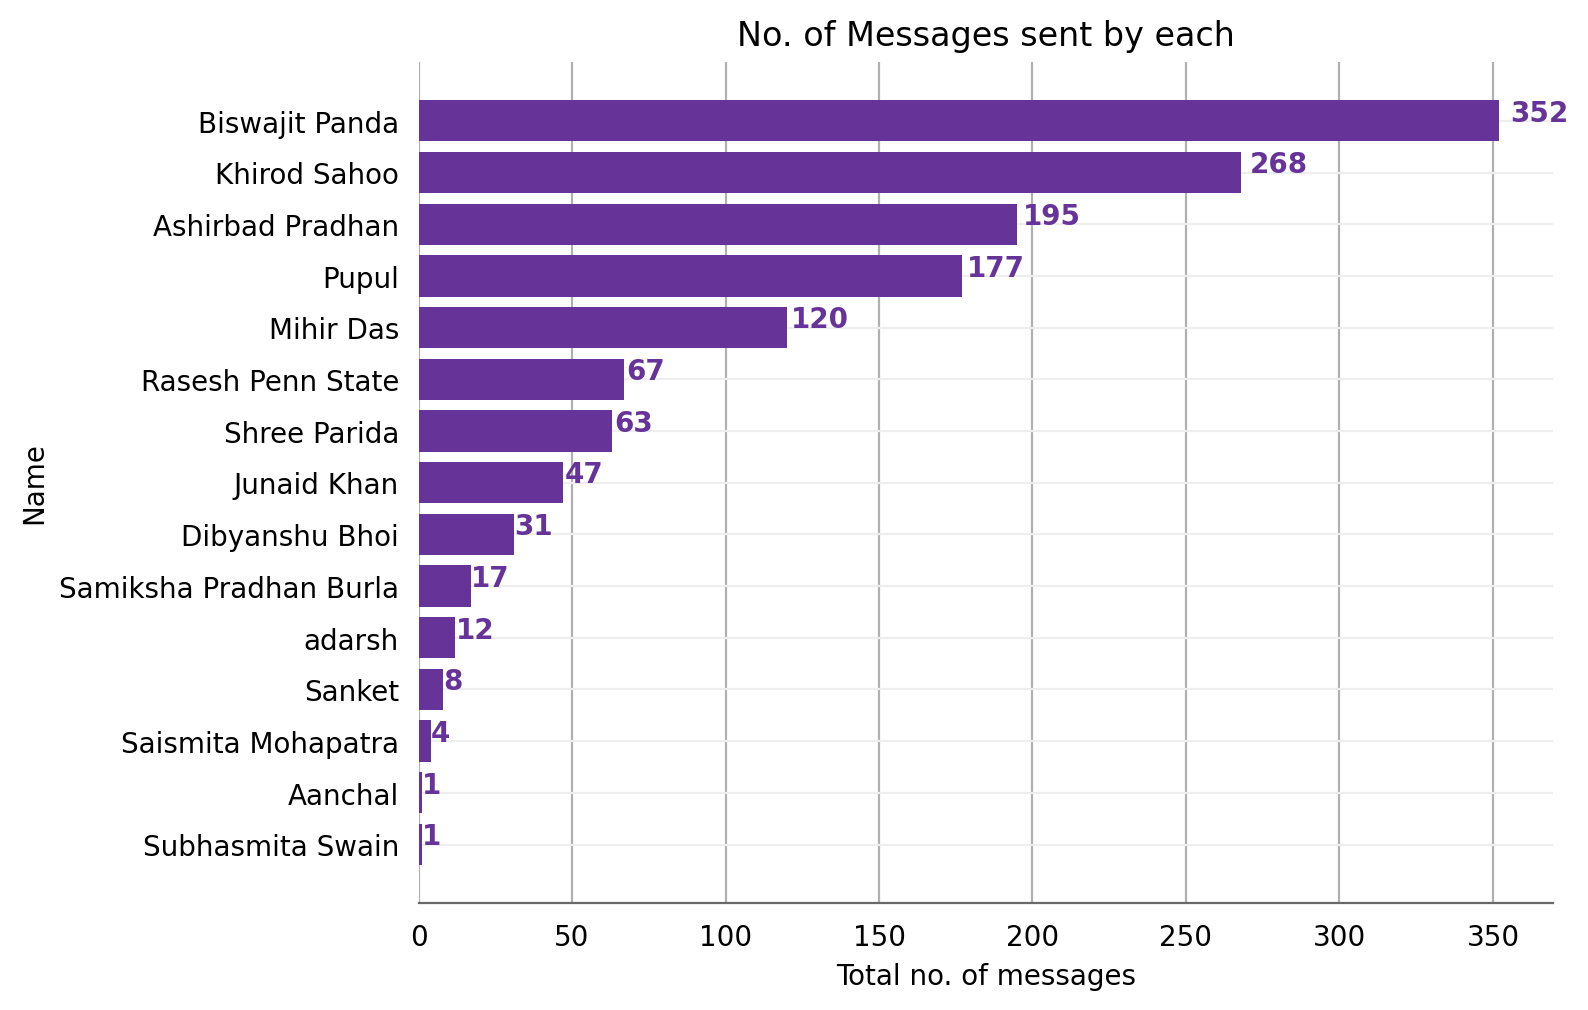

In [30]:

#Find the most talkative person in the group

author_talkative=df['Author'].value_counts().sort_values(ascending=True)
author_talkative_df=pd.DataFrame({'Author':author_talkative.index,'Messages_texted':author_talkative})
print(author_talkative.index)
def bar_plot(author_talkative,x_label,y_label,title):

  labels=np.array(author_talkative.index)
  y_pos=np.arange(len(author_talkative))
  plt.rcdefaults()
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats('retina', quality=100)

  fig,axes=plt.subplots()
  plt.rcParams['figure.figsize'] = (8, 5)
  fig.tight_layout()

  bars=axes.barh(y_pos,width=author_talkative,height=0.8,color='rebeccapurple')
  axes.set_yticks(y_pos)
  axes.set_yticklabels(labels)
  axes.set_xlabel(x_label)
  axes.set_ylabel(y_label)
  axes.set_title(title)
# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
  axes.spines['top'].set_visible(False)
  axes.spines['right'].set_visible(False)
  axes.spines['left'].set_visible(False)
  axes.spines['bottom'].set_color('dimgray')

# Second, remove the ticks as well.
  axes.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
  axes.set_axisbelow(True)
  axes.yaxis.grid(False, color='#EEEEEE')
  axes.xaxis.grid(True)

# Grab the color of the bars so we can make the

  for i, v in enumerate(author_talkative):
    print(str(i)+" "+str(v))
    axes.text(v + v/100, i , str(v), color=bars[0].get_facecolor(), fontweight='bold')

  plt.show()
bar_plot(author_talkative,'Total no. of messages','Name','No. of Messages sent by each')

In [31]:
#Authors with no name
null_authors=df[df['Author'].isnull()]
print(null_authors['Message'])


0            You created group "ଆସ ମିଶିକି ଏଠି ହଗିବା💩💩💩🤢"
2      You added Biswajit Panda, Rasesh Penn State an...
4                    You added adarsh and Dibyanshu Bhoi
25                                 You added Junaid Khan
59                     You changed the group description
61     Rasesh Penn State changed the subject from "ଆସ...
67     Rasesh Penn State changed the subject from "Ko...
69     You changed the subject from "Khirod weds Pupu...
71     Rasesh Penn State changed the subject from "ସବ...
127                                      You added Pupul
210    Mihir Das changed the subject from "Extended F...
216    Ashirbad Pradhan changed the subject from "Mau...
222    You changed the subject from "Mausimananku nam...
343                    You changed the group description
357    Pupul added Aanchal, Saismita Mohapatra, Samik...
448                    You changed the group description
469                      Pupul changed this group's icon
470                        You 

         Date     Time          Author          Message  Gender
151  27/03/20  1:08 am  Dibyanshu Bhoi  <Media omitted>    male
159  27/03/20  1:11 am           Pupul  <Media omitted>  female
185  27/03/20  1:14 am           Pupul  <Media omitted>  female
221  27/03/20  1:19 am           Pupul  <Media omitted>  female
306  27/03/20  1:31 am           Pupul  <Media omitted>  female
0 1
1 1
2 1
3 1
4 3
5 4
6 5
7 5
8 8
9 12


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


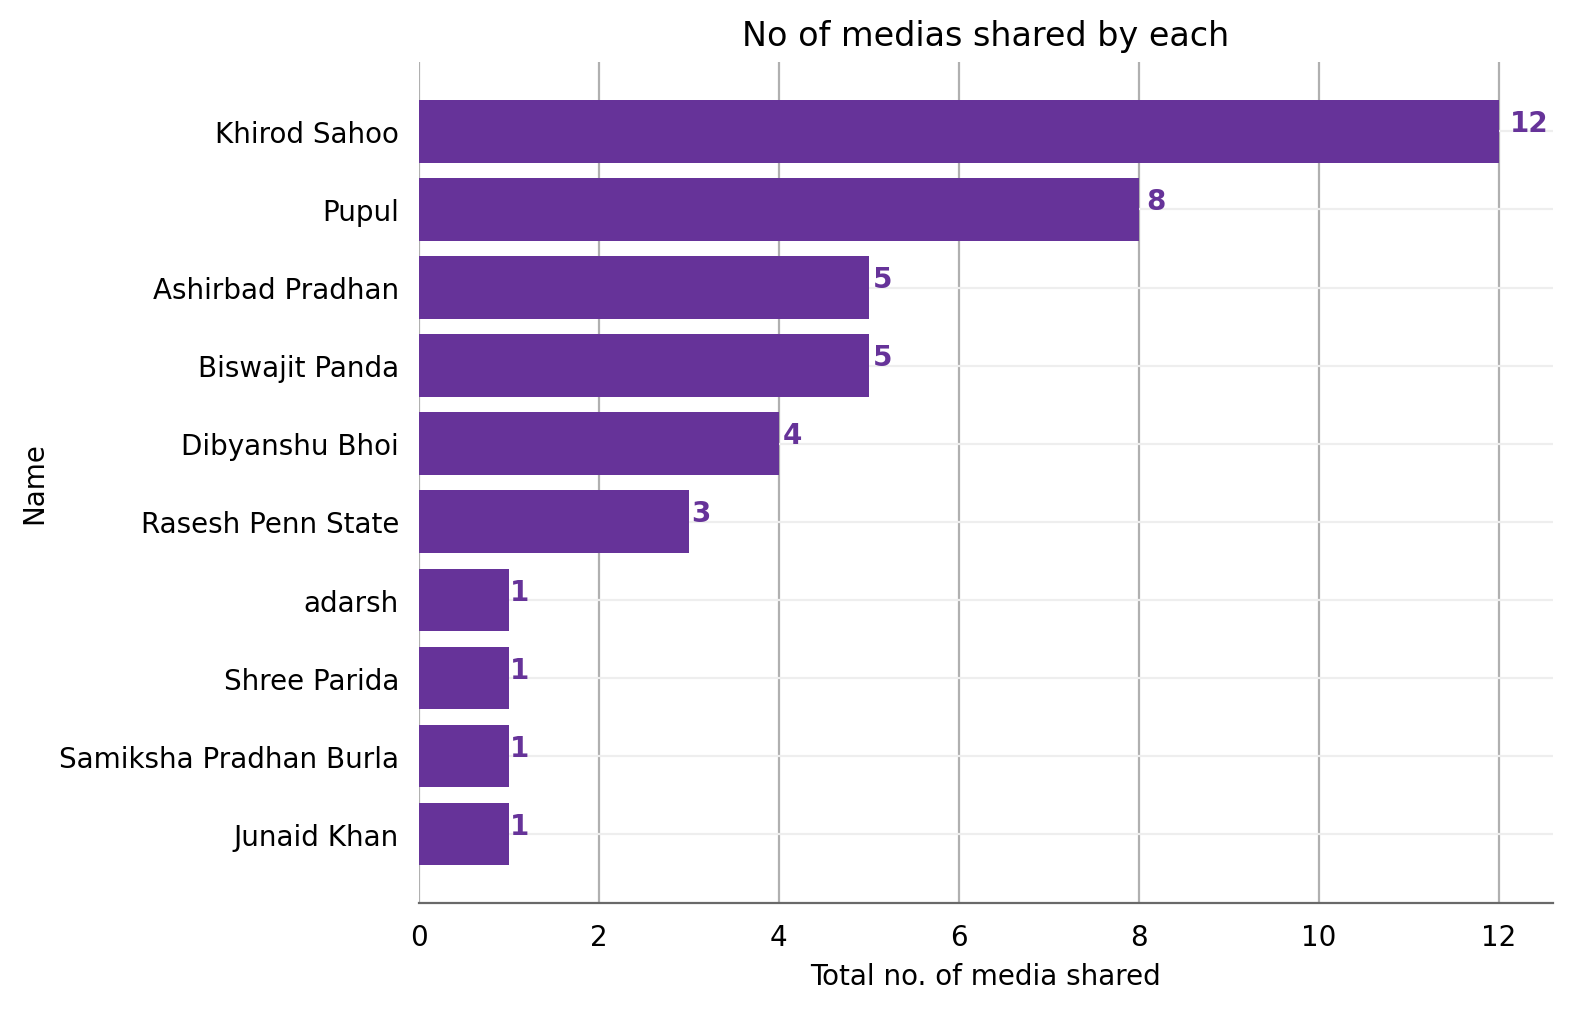

In [32]:
media_messages = df[df['Message'] == '<Media omitted>']
print(media_messages.head())

author_media_messages_value_counts = media_messages['Author'].value_counts().sort_values(ascending=True)
author_media_messages_value_counts_df=pd.DataFrame({'Author':author_media_messages_value_counts.index,'Media_shared':author_media_messages_value_counts})
bar_plot(author_media_messages_value_counts,'Total no. of media shared','Name','No of medias shared by each')

In [33]:
#data cleaning
df_clean=df.drop(null_authors.index)
df_clean.head()

,Date,Time,Author,Message,Gender
1,27/03/20,12:40 am,Khirod Sahoo,Nua group,male
3,27/03/20,12:41 am,Biswajit Panda,Mg hagiba taku hasiba kare,male
5,27/03/20,12:41 am,Khirod Sahoo,Bhak,male
6,27/03/20,12:41 am,Khirod Sahoo,Boring heba,male
7,27/03/20,12:41 am,Biswajit Panda,Aja always into nasty stuffs😂,male


In [34]:
df_clean['Letter_count']=df['Message'].apply(lambda s:len(s))
df_clean['Word_count']=df['Message'].apply(lambda s:len(s.split(' ')))
df_clean.head()

,Date,Time,Author,Message,Gender,Letter_count,Word_count
1,27/03/20,12:40 am,Khirod Sahoo,Nua group,male,9,2
3,27/03/20,12:41 am,Biswajit Panda,Mg hagiba taku hasiba kare,male,26,5
5,27/03/20,12:41 am,Khirod Sahoo,Bhak,male,4,1
6,27/03/20,12:41 am,Khirod Sahoo,Boring heba,male,11,2
7,27/03/20,12:41 am,Biswajit Panda,Aja always into nasty stuffs😂,male,29,5


In [35]:
group_df=df_clean.groupby(['Author'])['Letter_count','Word_count'].sum().sort_values(by=['Word_count','Letter_count'],ascending=False)
print(pd.DataFrame(group_df))


                        Letter_count  Word_count
Author                                          
Biswajit Panda                  6866        1372
Khirod Sahoo                    5681        1035
Ashirbad Pradhan                3658         706
Pupul                           2519         486
Mihir Das                       1753         355
Rasesh Penn State               1519         273
Junaid Khan                     1070         208
Shree Parida                     998         189
Dibyanshu Bhoi                   621         109
Samiksha Pradhan Burla           226          47
Sanket                           206          42
adarsh                           157          31
Saismita Mohapatra               167          25
Subhasmita Swain                  29           6
Aanchal                            4           1


0 386
1 241
2 192
3 161
4 118
5 74
6 62
7 50

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.



8 29
9 13
10 13
11 6
12 6
13 3
14 3
15 2
16 1
17 1
18 1
19 1


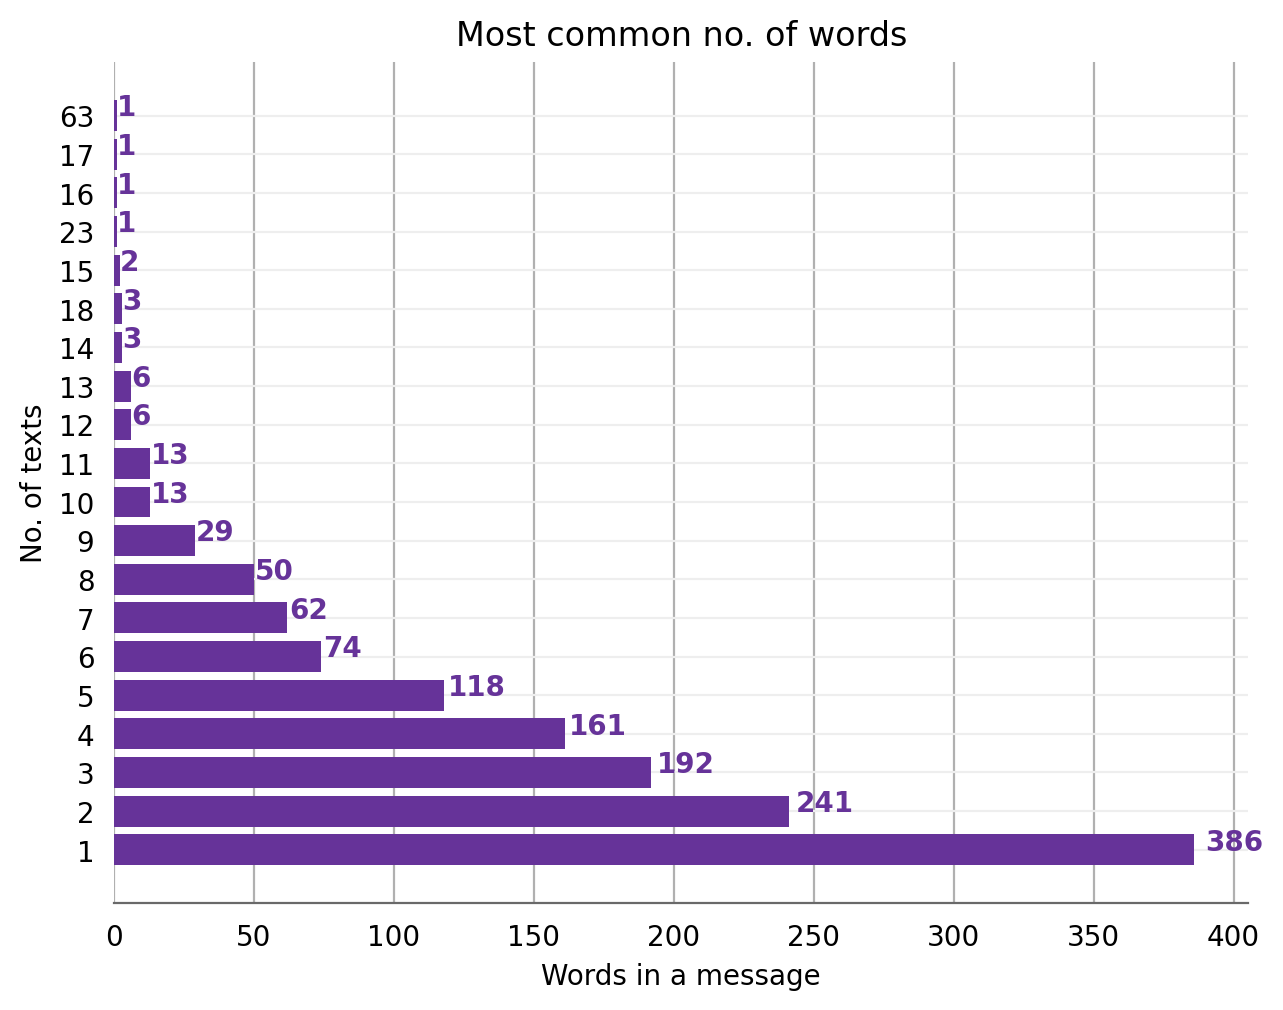

In [36]:
word_count_value_counts=df_clean['Word_count'].value_counts()
word_count_value_counts
bar_plot(word_count_value_counts,'Words in a message','No. of texts','Most common no. of words')


Text(0, 0.5, 'No. of texts')

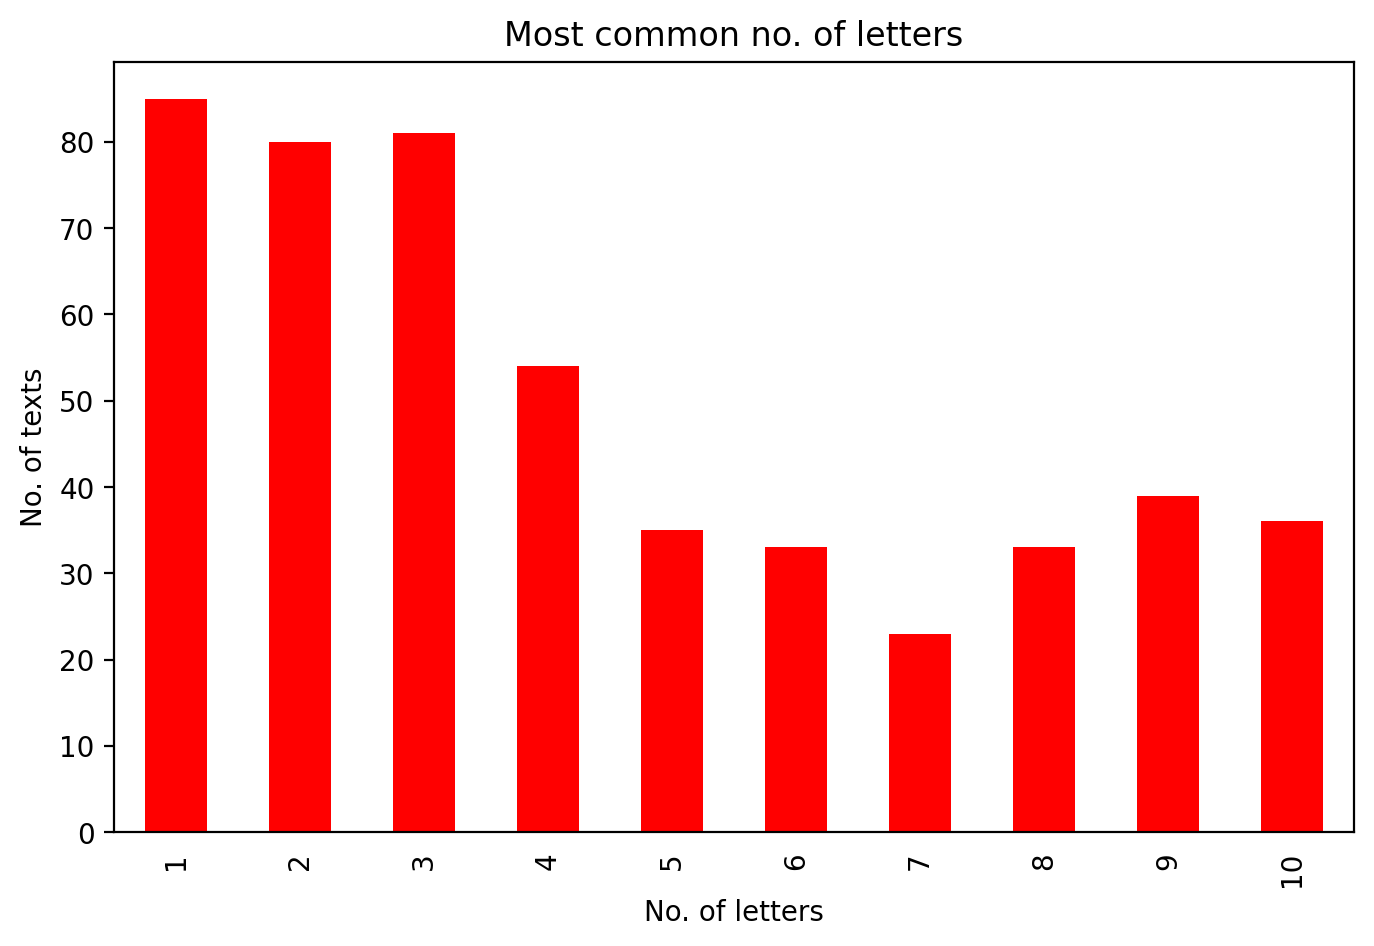

In [37]:
letter_count_value_counts=df_clean['Letter_count'].value_counts().sort_index(ascending=True)
letter_count_value_counts.head(10).plot.bar(color='r')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labelsize=10,
    zorder=0,
    grid_alpha=0,
) 
plt.title('Most common no. of letters')
plt.xlabel('No. of letters')
plt.ylabel('No. of texts')


In [38]:
#expand our dataset
df_clean.head()
import datetime 
import time
author_min_date=pd.DataFrame(df_clean.groupby('Author')['Date'].min())
author_max_date=pd.DataFrame(df_clean.groupby('Author')['Date'].max())
author_minmax_date=author_min_date.merge(author_max_date,on='Author', how='left',indicator=True)
author_minmax_date.rename(columns={'Date_x':'Start_date','Date_y':'Last_date'},inplace=True)

author_minmax_date['start_day']=''
author_minmax_date['start_month']=''
author_minmax_date['start_year']=''
author_minmax_date['last_day']=''
author_minmax_date['last_month']=''
author_minmax_date['last_year']=''
#author_minmax_date[['start_day','start_month','start_year']]=[['','','']]
print(author_minmax_date['Start_date'].dtypes)
#author_minmax_date[['start_day']]=author_minmax_date['Start_date'].apply(lambda s: np.array(s.split("/")))
#def get_date()

for i in range(author_minmax_date.shape[0]):

  x=list(map(int,author_minmax_date['Start_date'][i].split("/")))
  author_minmax_date['start_day'][i]=x[0]
  author_minmax_date['start_month'][i]=x[1]
  author_minmax_date['start_year'][i]=x[2]

  y=list(map(int,author_minmax_date['Last_date'][i].split("/")))
  author_minmax_date['last_day'][i]=y[0]
  author_minmax_date['last_month'][i]=y[1]
  author_minmax_date['last_year'][i]=y[2]




author_minmax_date['Start_date']=pd.to_datetime(author_minmax_date['Start_date'])
author_minmax_date['Last_date']=pd.to_datetime(author_minmax_date['Last_date'])
author_minmax_date.head()

object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be s

,Start_date,Last_date,_merge,start_day,start_month,start_year,last_day,last_month,last_year
Author,,,,,,,,,
Aanchal,2020-03-28,2020-03-28,both,28,3,20,28,3,20
Ashirbad Pradhan,2020-03-27,2020-03-30,both,27,3,20,30,3,20
Biswajit Panda,2020-03-27,2020-03-30,both,27,3,20,30,3,20
Dibyanshu Bhoi,2020-03-27,2020-03-30,both,27,3,20,30,3,20
Junaid Khan,2020-03-27,2020-03-30,both,27,3,20,30,3,20


In [39]:
#No. of days in the group
import datetime 
import time
x=np.array([1]*author_minmax_date.shape[0])
x=pd.Series(x,dtype='int32')
x
author_minmax_date['Active_Days']=((author_minmax_date['Last_date']-author_minmax_date['Start_date'])+datetime.timedelta(days=1)).dt.days.astype(int)
author_minmax_date.drop(columns=['start_day','start_year','last_day','last_month','last_year','_merge','start_month'],inplace=True)
author_minmax_date.head()




,Start_date,Last_date,Active_Days
Author,,,
Aanchal,2020-03-28,2020-03-28,1
Ashirbad Pradhan,2020-03-27,2020-03-30,4
Biswajit Panda,2020-03-27,2020-03-30,4
Dibyanshu Bhoi,2020-03-27,2020-03-30,4
Junaid Khan,2020-03-27,2020-03-30,4


In [53]:

df_clean['Date']=pd.to_datetime(df_clean['Date'])
df_clean.head()
df_active_days=pd.DataFrame(df_clean.groupby('Author')['Date'].nunique()).rename(columns={'Date':'Days_texted'})
df_author_info=pd.DataFrame(data=df_active_days.index)
df_author_info['Author'].head()

#leftjoin all data gathered
df_author_info=df_author_info.merge(df_active_days,on='Author',how='left')
df_author_info=df_author_info.merge(author_minmax_date,on='Author',how='left')
df_author_info=df_author_info.merge(group_df,on='Author',how='left')
df_author_info=df_author_info.merge(author_media_messages_value_counts_df,on='Author',how='left')
df_author_info=df_author_info.merge(author_talkative_df,on='Author',how='left')
df_author_info=df_author_info.merge(df_clean[['Author','Gender']].drop_duplicates(subset='Author'),on='Author',how='left')
df_author_info.replace(np.NaN,0,inplace=True)
df_author_info['Total_days_on_whatsapp']=(np.array([datetime.date.today()]*df_author_info.shape[0],dtype='datetime64[ns]')-df_author_info['Start_date']).dt.days.astype(int)
print(pd.DataFrame(df_author_info))
print(df_clean[df_clean['Author']=='Aanchal'])

                    Author  Days_texted  ...  Gender Total_days_on_whatsapp
0                  Aanchal            1  ...  female                      3
1         Ashirbad Pradhan            4  ...    male                      4
2           Biswajit Panda            4  ...    male                      4
3           Dibyanshu Bhoi            4  ...    male                      4
4              Junaid Khan            4  ...    male                      4
5             Khirod Sahoo            4  ...    male                      4
6                Mihir Das            3  ...    male                      4
7                    Pupul            3  ...  female                      4
8        Rasesh Penn State            3  ...    male                      4
9       Saismita Mohapatra            2  ...  female                      4
10  Samiksha Pradhan Burla            3  ...  female                      4
11                  Sanket            1  ...    male                      4
12          

In [41]:
print(author_media_messages_value_counts_df.head())
print(author_talkative_df.head())


                                        Author  Media_shared
Junaid Khan                        Junaid Khan             1
Samiksha Pradhan Burla  Samiksha Pradhan Burla             1
Shree Parida                      Shree Parida             1
adarsh                                  adarsh             1
Rasesh Penn State            Rasesh Penn State             3
                                Author  Messages_texted
Subhasmita Swain      Subhasmita Swain                1
Aanchal                        Aanchal                1
Saismita Mohapatra  Saismita Mohapatra                4
Sanket                          Sanket                8
adarsh                          adarsh               12


In [54]:
#Scoring of data
df_author_info['Media_shared']=df_author_info['Media_shared'].astype(int)
df_author_info

,Author,Days_texted,Start_date,Last_date,Active_Days,Letter_count,Word_count,Media_shared,Messages_texted,Gender,Total_days_on_whatsapp
0,Aanchal,1,2020-03-28,2020-03-28,1,4,1,0,1,female,3
1,Ashirbad Pradhan,4,2020-03-27,2020-03-30,4,3658,706,5,195,male,4
2,Biswajit Panda,4,2020-03-27,2020-03-30,4,6866,1372,5,352,male,4
3,Dibyanshu Bhoi,4,2020-03-27,2020-03-30,4,621,109,4,31,male,4
4,Junaid Khan,4,2020-03-27,2020-03-30,4,1070,208,1,47,male,4
5,Khirod Sahoo,4,2020-03-27,2020-03-30,4,5681,1035,12,268,male,4
6,Mihir Das,3,2020-03-27,2020-03-29,3,1753,355,0,120,male,4
7,Pupul,3,2020-03-27,2020-03-29,3,2519,486,8,177,female,4
8,Rasesh Penn State,3,2020-03-27,2020-03-30,4,1519,273,3,67,male,4
9,Saismita Mohapatra,2,2020-03-27,2020-03-28,2,167,25,0,4,female,4


In [59]:
#derive new variables from the existing ones
df_author_info['Consistency'] = (100*df_author_info['Days_texted']/df_author_info['Total_days_on_whatsapp']).round()
df_author_info['Frequency'] = ((df_author_info['Messages_texted']+df_author_info['Media_shared'])/df_author_info['Total_days_on_whatsapp']).round(2)
df_author_info['Agressiveness'] = (df_author_info['Messages_texted']/df_author_info['Days_texted']).round(2)
df_author_info

,Author,Days_texted,Start_date,Last_date,Active_Days,Letter_count,Word_count,Media_shared,Messages_texted,Gender,Total_days_on_whatsapp,Consistency,Frequentness,Agressiveness
0,Aanchal,1,2020-03-28,2020-03-28,1,4,1,0,1,female,3,33.0,0.33,1.00
1,Ashirbad Pradhan,4,2020-03-27,2020-03-30,4,3658,706,5,195,male,4,100.0,50.00,48.75
2,Biswajit Panda,4,2020-03-27,2020-03-30,4,6866,1372,5,352,male,4,100.0,89.25,88.00
3,Dibyanshu Bhoi,4,2020-03-27,2020-03-30,4,621,109,4,31,male,4,100.0,8.75,7.75
4,Junaid Khan,4,2020-03-27,2020-03-30,4,1070,208,1,47,male,4,100.0,12.00,11.75
5,Khirod Sahoo,4,2020-03-27,2020-03-30,4,5681,1035,12,268,male,4,100.0,70.00,67.00
6,Mihir Das,3,2020-03-27,2020-03-29,3,1753,355,0,120,male,4,75.0,30.00,40.00
7,Pupul,3,2020-03-27,2020-03-29,3,2519,486,8,177,female,4,75.0,46.25,59.00
8,Rasesh Penn State,3,2020-03-27,2020-03-30,4,1519,273,3,67,male,4,75.0,17.50,22.33
9,Saismita Mohapatra,2,2020-03-27,2020-03-28,2,167,25,0,4,female,4,50.0,1.00,2.00


In [96]:
#Insert hours of the day in 24hrs format
df_clean.head()
def convert24(str1): 
      
    # Checking if last two elements of time 
    # is AM and first two elements are 12 
    if (str1[-2:]).lower() == "am" and (str1[:2]).lower() == "12": 
        return str(0) 
          
    # remove the AM     
    elif (str1[-2:]).lower() == "am": 
        return str1[:2].replace(':','') 
      
    # Checking if last two elements of time 
    # is PM and first two elements are 12    
    elif (str1[-2:]).lower() == "pm" and (str1[:2]).lower() == "12": 
        return str1[:2].replace(':','')  
          
    else: 
          
        # add 12 to hours and remove PM 
        return str(int(str1[:2].replace(':','')) + 12) 
  
        
print(convert24("12:40   pm")) 
df_clean['Hours']=df_clean['Time'].apply(lambda x : convert24(x.strip()))
df_clean.head() 

12


,Date,Time,Author,Message,Gender,Letter_count,Word_count,Hours
1,2020-03-27,12:40 am,Khirod Sahoo,Nua group,male,9,2,0
3,2020-03-27,12:41 am,Biswajit Panda,Mg hagiba taku hasiba kare,male,26,5,0
5,2020-03-27,12:41 am,Khirod Sahoo,Bhak,male,4,1,0
6,2020-03-27,12:41 am,Khirod Sahoo,Boring heba,male,11,2,0
7,2020-03-27,12:41 am,Biswajit Panda,Aja always into nasty stuffs😂,male,29,5,0


In [0]:
import warnings
warnings.filterwarnings("ignore")
import nltk
from datetime import datetime, timedelta
import string
import emoji
import re
import seaborn as sns
sns.set(style='darkgrid')
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [0]:
#Futher expansion of dataset
df_author_more_info = pd.DataFrame(df_author_info[['Author','Messages_texted','Word_count']]).reset_index()
df_author_more_info['avgWordspertext'] = 0
df_author_more_info['minWordspertext'] = 0
df_author_more_info['maxWordspertext'] = 0
df_author_more_info['evocab'] = 0
df_author_more_info['totalemojis'] = 0
df_author_more_info['top5emojis'] = 0
df_author_more_info['vocab'] = 0
df_author_more_info['top5words'] = 0
def nltk_sentiment(sentence):
      nltk_sentiment = SentimentIntensityAnalyzer()
      score = nltk_sentiment.polarity_scores(sentence)
      return score
def getResult(pos, neu, neg):
    if (pos > neu and pos > neg):
        return ("Positive")
    elif (neg > neu and neg > pos):
        return ("Negative")
    else:
        return('Neutral')

dfHFreqs = pd.DataFrame(df_clean.groupby(['Hour'])['Hour'].count())
dfHFreqs.columns = ['Group']
dfHFreqs = dfHFreqs.reset_index()
dfHFreqs.columns = ['Hour','Group']
s = dfHFreqs['Group'].sum()
dfHFreqs['Group'] = 100*dfHFreqs['Group']/s

names['Pos'] = 0
names['Neu'] = 0
names['Neg'] = 0
names['avgTime'] = 0
stop = stopwords.words('english')
vStopWords = ["thats","dont","also","like","https","from","all","also","and","any","are","but","can","cant","cry","due","etc","few","for","get","had","has","hasnt","have","her","here","hers","herself","him","himself","his","how","inc","into","its","ltd","may","nor","not","now","off","once","one","only","onto","our","ours","out","over","own","part","per","put","see","seem","she","than","that","the","their","them","then","thence","there","these","they","this","those","though","thus","too","top","upon","very","via","was","were","what","when","which","while","who","whoever","whom","whose","why","will","with","within","without","would","yet","you","your","yours","the"]
stop = stop + vStopWords
ylabel='% of total time spent'
xlabel='Time clock in 24 hours'

In [0]:
for name in names['Name']:
  data1 = data[data['Name']==name]
  dstr = ' '.join(data1['Text'])
  dlist = data1['Text'].to_list()
  
  #names['avgTime'][names['Name']==name] = data1['Time'].mean().strftime("%I:%M %p")

  L1 = []
  for l in dlist:
    L1.append(len(l.split()))
  names['avgWordspertext'][names['Name']==name] = np.mean(L1)
  names['minWordspertext'][names['Name']==name] = np.min(L1)
  names['maxWordspertext'][names['Name']==name] = np.max(L1)
  
  LE = []
  LE = [c for c in dstr if c in emoji.UNICODE_EMOJI]
  dfE = pd.DataFrame({'Emoji':LE})
  dfEFreqs = pd.DataFrame(dfE.groupby(['Emoji'])['Emoji'].count())
  dfEFreqs.columns = ['Freq']
  dfEFreqs = dfEFreqs.reset_index()
  dfEFreqs.columns = ['Emoji','Freq']
  names['evocab'][names['Name']==name] = len(dfEFreqs)
  names['totalemojis'][names['Name']==name] = dfEFreqs['Freq'].sum()
  dfEFreqs = dfEFreqs.sort_values('Freq',ascending=False)
  names['top5emojis'][names['Name']==name] = ' '.join(dfEFreqs['Emoji'][0:5])

  demoji = dstr.encode('ascii', 'ignore').decode('ascii')
  demoji = re.sub(r'[`!?~@#$%^&*()_+-=<>,.:;]', '', demoji)
  demoji = re.sub(r'[–]', '', demoji)
  demoji = re.sub(r'[\[\]\(\)\{\}]', '', demoji)
  demoji = re.sub(r'[\t\"\'\/\\]', '', demoji)
  lstAllWords = demoji.split()

  lstTmpWords=[]
  for strWord in lstAllWords:
      if len(strWord)>3:
          lstTmpWords.append(strWord)
  lstAllWords = lstTmpWords
  del lstTmpWords

  for i in range(0,len(lstAllWords)):
      lstAllWords[i] = str.lower(lstAllWords[i])

  dfWords = pd.DataFrame({'Words':lstAllWords})
  dfWords = dfWords[-dfWords['Words'].isin(stop)]
  dfWords = dfWords[-dfWords['Words'].isin(emoji.UNICODE_EMOJI.keys())]

  dfFreqs = pd.DataFrame(dfWords.groupby(['Words'])['Words'].count())
  dfFreqs.columns = ['Freq']
  dfFreqs = dfFreqs.reset_index()
  dfFreqs.columns = ['Word','Freq']
  names['vocab'][names['Name']==name] = len(dfFreqs)
  dfFreqs = dfFreqs.sort_values('Freq',ascending=False)
  names['top5words'][names['Name']==name] = ' '.join(dfFreqs['Word'][0:5])

  print('😎 '+name)
  d = {}
  for a, x in dfFreqs[0:10].values:
      d[a] = x 
  wordcloud = WordCloud(background_color="white")
  wordcloud.generate_from_frequencies(frequencies=d)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

  lstLines = sent_tokenize(dstr)
  lstLines = [t.lower() for t in lstLines]
  lstLines = [t.translate(str.maketrans('','',string.punctuation)) for t in lstLines]
  saResults = [nltk_sentiment(t) for t in lstLines]
  # create dataframe
  df = pd.DataFrame(lstLines, columns=['Lines'])
  df['Pos']=[t['pos'] for t in saResults]
  df['Neu']=[t['neu'] for t in saResults]
  df['Neg']=[t['neg'] for t in saResults]
  #df['Result']= [getResult(t['pos'],t['neu'],t['neg']) for t in saResults]
  names['Pos'][names['Name']==name] = df['Pos'].mean()
  names['Neu'][names['Name']==name] = df['Neu'].mean()
  names['Neg'][names['Name']==name] = df['Neg'].mean()  
    